In [3]:
import sys, os
import gc
import glob
from time import sleep
from time import time
if '../' not in sys.path:
    sys.path.insert(0, '../')

from modules.stacks import Stack
    
import matplotlib.pyplot as plt
import numpy as np

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
""" Set parameters """

preprocessing_kws = dict(median_radius=2,
                         gaussian_sigma=(2, 2),
                         clip_limit=0.03, clip_factor=20)
seed_kws=dict(sigma=2, min_distance=1)
seg_kws=dict()
segmentation_kw = dict(preprocessing_kws=preprocessing_kws, 
          seed_kws=seed_kws, seg_kws=seg_kws,
          min_segment_area=250)

fg_kw = dict(bandwidth=100, n=5)

annotation_kw = dict(q=95,
                     channel='r_normalized',
                     weighted=True,
                     fg_only=True,
                     upper_bound=90)

save_kw = dict(segmentation=True, image=True, foreground=True, annotation=True, dpi=100)
kw = dict(segmentation_kw=segmentation_kw, fg_kw=fg_kw, annotation_kw=annotation_kw, save_kw=save_kw)

In [5]:
control_slices = '/Volumes/bernasek_t5/pnt_manuscript/microscopy/yan_clones/control/slices/'
mutant_slices = '/Volumes/bernasek_t5/pnt_manuscript/microscopy/yan_clones/perturbation/slices/'
genotypes = os.listdir(control_slices)

In [6]:
import gc
import logging
logging.basicConfig(level=logging.INFO, #filename='segmentation.log', 
                    format='%(asctime)s - %(levelname)s - %(message)s')

def run(stack_path, save=True, **kw):
    disc_name = stack_path.split('_')[-1].strip('.tif')
    logging.info('Starting stack {:s}'.format(disc_name))
    stack = Stack(stack_path)
    try:
        stack.segment(bg='b', save=save, **kw)
    except Exception as e:
        logging.error(e)
        e.__traceback__ = None
    logging.info('Completed stack {:s}'.format(disc_name))

In [8]:
# for genotype in os.listdir(control_slices)[::-1]:
#     logging.info('Starting genotype {:s}'.format(genotype))
#     experiment_path = os.path.join(control_slices, genotype)
#     stack_paths = glob.glob(os.path.join(experiment_path, '*[0-9].tif'))        
#     for stack_path in stack_paths:
#         run(stack_path, save=True, **kw)
#     logging.info('Finished genotype {:s}'.format(genotype))
        
for genotype in os.listdir(mutant_slices):
    #logging.info('Starting genotype {:s}'.format(genotype))
    experiment_path = os.path.join(mutant_slices, genotype)
    stack_paths = glob.glob(os.path.join(experiment_path, '*[0-9].tif'))
    for stack_path in stack_paths:
        #run(stack_path, save=True, **kw)
        print(stack_path)
        break
    #logging.info('Finished genotype {:s}'.format(genotype))
    break

#logging.info('Finished all stacks.')

/Volumes/bernasek_t5/pnt_manuscript/microscopy/yan_clones/perturbation/slices/w-eyFLP_PntGFP_YanE833_FRT40A_Ubi-mRFPnls_FRT40A/2.tif


In [9]:
os.listdir(mutant_slices)

['w-eyFLP_PntGFP_YanE833_FRT40A_Ubi-mRFPnls_FRT40A',
 'Control_w-eyFLP_PntGFP_Ubi-mRFPnls_FRT40A_Cyo',
 'Control_NOclones_w-eyFLP_yanE833_PntGFP_FRT40A_Cyo',
 'Control_NOclones_w-eyFLP_PntGFP_Ubi-mRFPnls_FRT40A_Cyo',
 'Control_w-eyFLP_PntGFP_Ubi-mRFPnls_FRT40A',
 'Control_w-eyFLP_PntGFP_yan3833_FRT40A_CyO',
 'NO-DAPI_Control_w-eyFLP_PntGFP_Ubi-mRFPnls_FRT40A_Cyo',
 'NO-DAPI_w-eyFLP_PntGFP_YanE833_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A',
 'w-eyFLP_PntGFP_YanE833_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A',
 'Control_w-eyFLP_Ubi-mRFPnls_FRT40A_Cyo']

In [15]:
output = []

def parse(experiment, genotype, stack_path):
    stack = Stack(stack_path)
    for layer in range(stack.depth):
        record = dict(experiment=experiment, genotype=genotype, disc=stack.disc_name, layer=layer)
        output.append(record)
    

In [19]:
genotype = 'w-eyFLP_PntGFP_YanE833_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A'
stack_path = os.path.join(mutant_slices, genotype, '6.tif')

In [33]:
stack = Stack(stack_path)
    
stack.segment(bg='b', save=False, **kw)

In [35]:
stack.df

,id,centroid_x,centroid_y,r,r_std,g,g_std,b,b_std,pixel_count,layer,r_normalized,g_normalized,foreground,genotype
0,23,928.980328,2032.298361,0.245192,0.062586,0.328693,0.147186,0.558631,0.178175,305,0,0.438916,0.588389,True,1
1,24,828.745946,2030.305405,0.255351,0.063942,0.476333,0.149906,0.516650,0.178231,370,0,0.494245,0.921965,True,1
2,25,1167.065421,2030.302181,0.201161,0.068945,0.228067,0.127923,0.441175,0.228362,321,0,0.455967,0.516953,True,1
3,26,952.536232,2029.553140,0.266537,0.070774,0.227343,0.116190,0.558935,0.129413,414,0,0.476866,0.406743,True,1
4,29,523.404181,2022.754355,0.124236,0.049470,0.075212,0.070272,0.339355,0.157804,574,0,0.366094,0.221632,True,1
5,30,905.924686,2027.158996,0.241931,0.065531,0.483457,0.200432,0.652616,0.204261,478,0,0.370709,0.740798,True,1
6,32,1011.503546,2024.829787,0.376125,0.087689,0.403248,0.161523,0.606974,0.224826,282,0,0.619673,0.664358,True,1
7,33,1147.613435,2018.081115,0.288171,0.099249,0.206703,0.110670,0.429539,0.169151,789,0,0.670886,0.481220,True,1
8,34,768.165017,2022.818482,0.197735,0.063850,0.167803,0.103052,0.403350,0.104812,303,0,0.490233,0.416023,True,1
9,35,804.592715,2020.423841,0.367424,0.076722,0.141044,0.095984,0.358323,0.066591,302,0,1.025399,0.393622,True,1


In [42]:
layer = stack.load_layer(0)

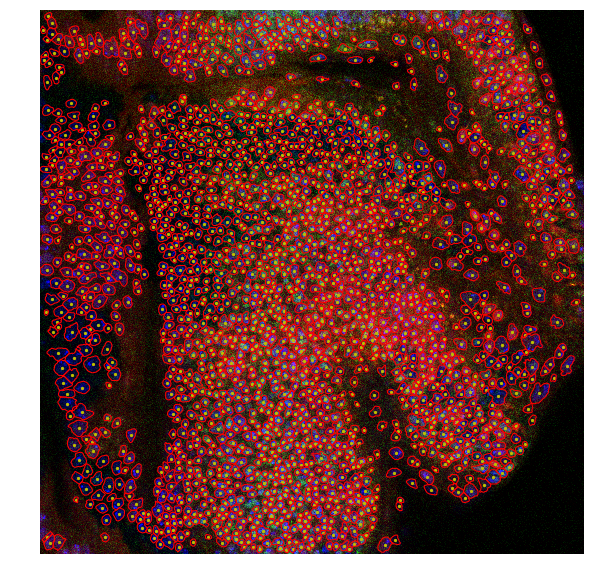

In [43]:
fig, ax = plt.subplots(figsize=(10, 10))
_ = layer.show(ax=ax)

xy = stack.df[['centroid_x', 'centroid_y']].values
ax.scatter(*xy.T, s=5, c='y')

In [22]:
from scipy.ndimage.measurements import center_of_mass


In [27]:
im = np.zeros((10, 10), dtype=int)
im[0:3, 7:10] = 1
im

array([[0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [32]:
center_of_mass(im.T, im.T, np.unique(im))

[(nan, nan), (8.0, 1.0)]

In [16]:
for genotype in os.listdir(control_slices)[::-1]:
    experiment_path = os.path.join(control_slices, genotype)
    stack_paths = glob.glob(os.path.join(experiment_path, '*[0-9].tif'))        
    for stack_path in stack_paths:
        parse('control', genotype, stack_path)
        
for genotype in os.listdir(mutant_slices):
    experiment_path = os.path.join(mutant_slices, genotype)
    stack_paths = glob.glob(os.path.join(experiment_path, '*[0-9].tif'))
    for stack_path in stack_paths:
        parse('perturbation', genotype, stack_path)

In [18]:
import pandas as pd

In [20]:
df = pd.DataFrame.from_records(output)

In [24]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('layers.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df.to_excel(writer, sheet_name='layers')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [12]:
stack.genotype_path

'/Volumes/bernasek_t5/pnt_manuscript/microscopy/yan_clones/perturbation/slices/Control_w-eyFLP_Ubi-mRFPnls_FRT40A_Cyo'

In [ ]:
def run_diagnostic(stack_path, save=True, **kw):
    disc_name = stack_path.split('_')[-1].strip('.tif')
    stack = Stack(stack_path)
    stack.segment(bg='b', save=save, **kw)

In [6]:
for genotype in os.listdir(control_slices)[::-1]:
    logging.info('Starting genotype {:s}'.format(genotype))
    experiment_path = os.path.join(control_slices, genotype)
    stack_paths = glob.glob(os.path.join(experiment_path, '*[0-9].tif'))    
    
    break

In [10]:
run_diagnostic(stack_paths[1], save=True, **kw)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

In [12]:
# # controls
# control_genotype = 'w-eyFLP_PntGFP_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A'
# overall_start = time()
# logging.info('Starting genotype {:s}'.format(control_genotype))
# experiment_path = os.path.join(control_slices, control_genotype)
# stack_paths = glob.glob(os.path.join(experiment_path, 'control*[0-9].tif'))        
# for stack_path in stack_paths:
#     run(stack_path, save=True, **kw)
# logging.info('Finished genotype {:s}'.format(control_genotype))

# mutants
mutant_genotype = 'w-eyFLP_PntGFP_YanE833_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A'
logging.info('Starting genotype {:s}'.format(mutant_genotype))
experiment_path = os.path.join(mutant_slices, mutant_genotype)
stack_paths = glob.glob(os.path.join(experiment_path, 'perturbation*[0-9].tif'))
for stack_path in stack_paths[13:]:
    run(stack_path, save=True, **kw)
    gc.collect()
    sleep(30)
logging.info('Finished genotype {:s}'.format(mutant_genotype))
logging.info('Finished all stacks.')

In [13]:
from pympler import summary, muppy
all_objects = muppy.get_objects()
summarized = summary.summarize(all_objects)
summarized = sorted(summarized, key=lambda x: x[-1], reverse=True)
summary.print_(summarized[:20], limit=5) 

                       types |   # objects |   total size
============================ | =========== | ============
                 <class 'str |       96225 |     17.91 MB
                <class 'dict |       16509 |     10.62 MB
  <class '_io.BufferedWriter |           4 |      4.38 MB
                <class 'code |       30480 |      4.19 MB
                <class 'type |        3397 |      3.50 MB
